In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
from langchain_groq import ChatGroq

In [2]:
load_dotenv()
llm = ChatGroq(
    model_name="llama-3.3-70b-versatile",
    temperature=0.7
)

In [3]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [4]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [5]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [6]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

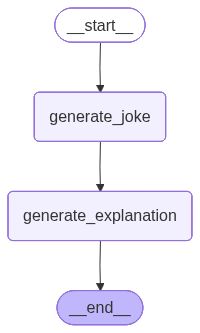

In [8]:
workflow

In [9]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty! (get it?)',
 'explanation': 'A classic play on words. The joke relies on a pun to create humor. Here\'s a breakdown of how it works:\n\nThe setup for the joke is "Why was the pizza in a bad mood?" which primes the listener to expect a reason related to the pizza\'s emotional state.\n\nThe punchline "Because it was feeling a little crusty!" is where the wordplay happens. "Crusty" has a double meaning here:\n\n1. In a literal sense, a pizza has a crust, which is the outer layer of the bread. So, the pizza is "crusty" because it has a crust.\n2. In an idiomatic sense, "feeling crusty" is an expression that means being irritable, grumpy, or in a bad mood. It\'s often used to describe someone who is being grouchy or short-tempered.\n\nThe joke exploits this dual meaning of "crusty" to create a humorous connection between the pizza\'s physical characteristic (having a crust) and its emoti

In [10]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty! (get it?)', 'explanation': 'A classic play on words. The joke relies on a pun to create humor. Here\'s a breakdown of how it works:\n\nThe setup for the joke is "Why was the pizza in a bad mood?" which primes the listener to expect a reason related to the pizza\'s emotional state.\n\nThe punchline "Because it was feeling a little crusty!" is where the wordplay happens. "Crusty" has a double meaning here:\n\n1. In a literal sense, a pizza has a crust, which is the outer layer of the bread. So, the pizza is "crusty" because it has a crust.\n2. In an idiomatic sense, "feeling crusty" is an expression that means being irritable, grumpy, or in a bad mood. It\'s often used to describe someone who is being grouchy or short-tempered.\n\nThe joke exploits this dual meaning of "crusty" to create a humorous connection between the pizza\'s physical characteristic (having a c

In [11]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty! (get it?)', 'explanation': 'A classic play on words. The joke relies on a pun to create humor. Here\'s a breakdown of how it works:\n\nThe setup for the joke is "Why was the pizza in a bad mood?" which primes the listener to expect a reason related to the pizza\'s emotional state.\n\nThe punchline "Because it was feeling a little crusty!" is where the wordplay happens. "Crusty" has a double meaning here:\n\n1. In a literal sense, a pizza has a crust, which is the outer layer of the bread. So, the pizza is "crusty" because it has a crust.\n2. In an idiomatic sense, "feeling crusty" is an expression that means being irritable, grumpy, or in a bad mood. It\'s often used to describe someone who is being grouchy or short-tempered.\n\nThe joke exploits this dual meaning of "crusty" to create a humorous connection between the pizza\'s physical characteristic (having a 

In [12]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the spaghetti refuse to get married?\n\nBecause it was afraid of getting tangled up in a lifelong commitment!',
 'explanation': 'A clever play on words. This joke is funny because it takes the common phrase "tangled up in a lifelong commitment" (which is often used to describe the complexities and challenges of marriage) and gives it a literal twist. Spaghetti, being a long, thin, and flexible type of pasta, can easily become tangled up in a physical sense. \n\nThe joke relies on a pun, using the word "tangled" to refer to both the physical property of spaghetti and the emotional/relational concept of being entangled in a commitment. The humor comes from the unexpected connection between the setup (spaghetti refusing to get married) and the punchline (the fear of getting tangled up), which creates a clever and amusing wordplay. The joke requires a quick mental shift to understand the double meaning of "tangled," which adds to the delight and surpris

In [13]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti refuse to get married?\n\nBecause it was afraid of getting tangled up in a lifelong commitment!', 'explanation': 'A clever play on words. This joke is funny because it takes the common phrase "tangled up in a lifelong commitment" (which is often used to describe the complexities and challenges of marriage) and gives it a literal twist. Spaghetti, being a long, thin, and flexible type of pasta, can easily become tangled up in a physical sense. \n\nThe joke relies on a pun, using the word "tangled" to refer to both the physical property of spaghetti and the emotional/relational concept of being entangled in a commitment. The humor comes from the unexpected connection between the setup (spaghetti refusing to get married) and the punchline (the fear of getting tangled up), which creates a clever and amusing wordplay. The joke requires a quick mental shift to understand the double meaning of "tangled," which adds to the 

In [14]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty! (get it?)', 'explanation': 'A classic play on words. The joke relies on a pun to create humor. Here\'s a breakdown of how it works:\n\nThe setup for the joke is "Why was the pizza in a bad mood?" which primes the listener to expect a reason related to the pizza\'s emotional state.\n\nThe punchline "Because it was feeling a little crusty!" is where the wordplay happens. "Crusty" has a double meaning here:\n\n1. In a literal sense, a pizza has a crust, which is the outer layer of the bread. So, the pizza is "crusty" because it has a crust.\n2. In an idiomatic sense, "feeling crusty" is an expression that means being irritable, grumpy, or in a bad mood. It\'s often used to describe someone who is being grouchy or short-tempered.\n\nThe joke exploits this dual meaning of "crusty" to create a humorous connection between the pizza\'s physical characteristic (having a 